# **Customer Churn Prediction with Neural Networks 🧠⚡**

In this project, we will build an **Artificial Neural Network (ANN)** to predict customer churn for a telecom company. The model will be trained on the **Telco Customer Churn dataset**, which contains various features such as customer demographics, account information, and services used.

The goal of this project is to accurately predict whether a customer will churn (leave the company) based on their characteristics, helping businesses take proactive steps to retain valuable customers.

### Key Steps:
1. **Data Preprocessing**: Cleaning and preparing the data for modeling.
2. **Model Building**: Constructing an Artificial Neural Network for classification.
3. **Model Training**: Training the model with optimized loss function and optimizer.
4. **Model Evaluation**: Assessing the model performance using accuracy, confusion matrix, and classification report.
5. **Visualization**: Plotting training loss to visualize model improvement over epochs.

## 1. Import Libraries

In this section, we import all the necessary libraries for data processing, model building, and evaluation:
- **Pandas** for data manipulation
- **NumPy** for numerical operations
- **Torch** for building the neural network model
- **Sklearn** for data preprocessing, splitting, and evaluation
- **Imbalanced-learn (SMOTE)** for handling imbalanced datasets

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, auc, precision_recall_curve
from imblearn.over_sampling import SMOTE

## 2. Load and Preprocess the Data

We load the **Telco Customer Churn dataset** and perform basic preprocessing:
- **Drop the 'customerID' column** since it is not useful for the model.
- **Handle missing or erroneous data**: The `TotalCharges` column is cleaned by replacing any empty strings with `0.0`.
- **Label encoding** is applied to categorical columns, transforming them into numeric values.
- The target column **'Churn'** is mapped to binary values: `1` for 'Yes' and `0` for 'No'.

In [51]:
# Load the dataset
df = pd.read_csv("/Users/ahmedabdulwahid/Desktop/churn model/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [52]:
df.shape

(7043, 21)

In [53]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [55]:
df = df.drop(columns=["customerID"])


In [56]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"}).astype(float)


In [57]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

/var/folders/qg/mkzrt26d3w3g4nybmsfxhqhm0000gn/T/ipykernel_69153/2364848822.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


In [58]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [59]:
# Label encoding for categorical columns
object_columns = df.select_dtypes(include="object").columns
encoders = {}
for column in object_columns:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    encoders[column] = encoder

## 3. Feature Selection and Standardization

Here, we define the features (X) and the target variable (y):
- We separate **'Churn'** as the target and all other columns as features.
- **Standardization** is applied to the numerical features to ensure they are on the same scale, which helps improve the model's convergence during training.

In [60]:
# Identify numerical features
numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

# Features and target split
X = df.drop(columns=["Churn"])
y = df["Churn"]


In [61]:
X, y

(      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
 0          0              0        1           0       1             0   
 1          1              0        0           0      34             1   
 2          1              0        0           0       2             1   
 3          1              0        0           0      45             0   
 4          0              0        0           0       2             1   
 ...      ...            ...      ...         ...     ...           ...   
 7038       1              0        1           1      24             1   
 7039       0              0        1           1      72             1   
 7040       0              0        1           1      11             0   
 7041       1              1        1           0       4             1   
 7042       1              0        0           0      66             1   
 
       MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
 0                 1       

In [62]:
# Standardize numerical features
scaler = StandardScaler()
X[numerical_features_list] = scaler.fit_transform(X[numerical_features_list])


## 4. Train-Test Split and SMOTE for Imbalanced Data

- The dataset is split into training and test sets using **train_test_split**.
- **SMOTE (Synthetic Minority Over-sampling Technique)** is applied to the training set to handle class imbalance. This generates synthetic samples for the minority class (Churn = 1), helping to balance the dataset.

In [63]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Oversampling with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## 5. Convert Data to PyTorch Tensors

Next, we convert the **training** and **test** datasets into PyTorch tensors, which are required for input to the neural network.

In [65]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_smote.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_smote.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

## 6. Define the Artificial Neural Network (ANN) Model

We define a simple **3-layer neural network** with:
- An input layer matching the number of features.
- A **hidden layer** with 64 units and ReLU activation.
- Another **hidden layer** with 32 units.
- An **output layer** with 2 units for the binary classification (Churn: 0 or 1).

The output layer uses **softmax** activation to provide probabilities for the two classes.

In [66]:
# Define the ANN model
class ANNModel(nn.Module):
    def __init__(self, input_size):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return self.softmax(x)

## 7. Train the Model

We use **Cross-Entropy Loss** for the binary classification task and the **Adam optimizer** for model training. The model is trained for 50 epochs, with the loss being computed and updated at each step.

In [75]:
# Initialize the model
input_size = X_train.shape[1]
model = ANNModel(input_size)

In [68]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch [10/100], Loss: 0.6750
Epoch [20/100], Loss: 0.6411
Epoch [30/100], Loss: 0.5976
Epoch [40/100], Loss: 0.5601
Epoch [50/100], Loss: 0.5405
Epoch [60/100], Loss: 0.5325
Epoch [70/100], Loss: 0.5284
Epoch [80/100], Loss: 0.5256
Epoch [90/100], Loss: 0.5233
Epoch [100/100], Loss: 0.5210


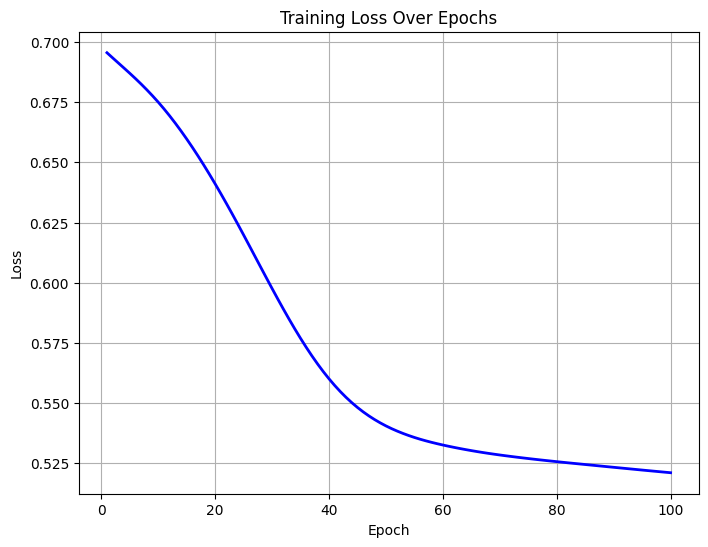

In [69]:
epoch_losses = []

# Training the model
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Store the loss for each epoch
    epoch_losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Plotting the loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), epoch_losses, color='b', lw=2)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


## 8. Evaluate the Model

After training, the model is evaluated on the **test set**. We compute:
- **Accuracy**
- **Confusion Matrix**
- **Classification Report** (precision, recall, f1-score for each class)

This gives us insights into the model's performance and how well it classifies the target classes (Churn or Not Churn).

In [70]:
# Evaluate the model
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    _, y_test_pred_classes = torch.max(y_test_pred, 1)
    acc = accuracy_score(y_test_tensor, y_test_pred_classes)
    print(f"Accuracy: {acc:.2f}")

    print("Confusion Matrix:")

    print(confusion_matrix(y_test_tensor, y_test_pred_classes))

    print("Classification Report:")
    
    print(classification_report(y_test_tensor, y_test_pred_classes))

Accuracy: 0.75
Confusion Matrix:
[[759 277]
 [ 72 301]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1036
           1       0.52      0.81      0.63       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.77      1409



## 9. Visualization


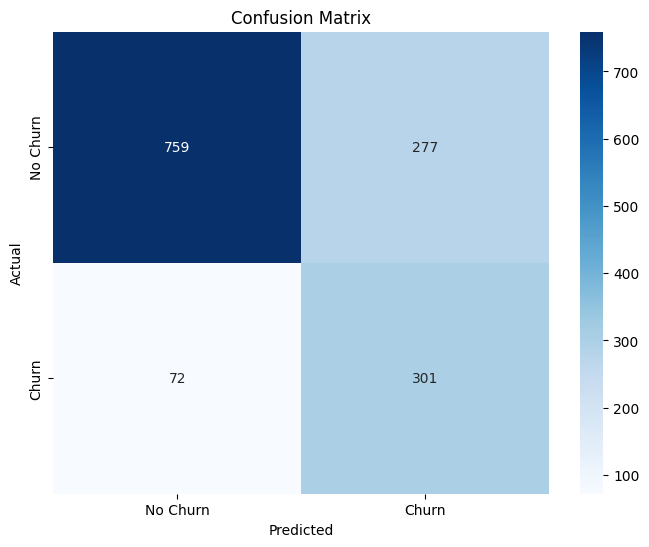

In [71]:
# 1. Confusion Matrix Heatmap
cm = confusion_matrix(y_test_tensor, y_test_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

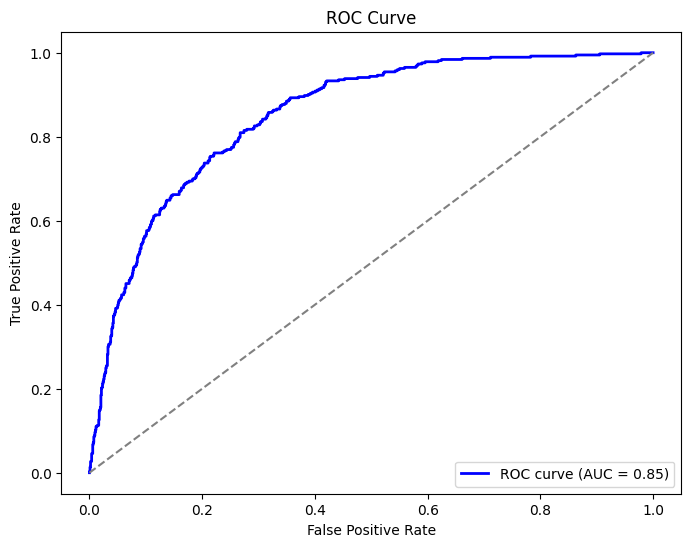

In [72]:
# 2. ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test_tensor, y_test_pred[:, 1])  # y_test_pred[:, 1] gives probabilities for churn (class 1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

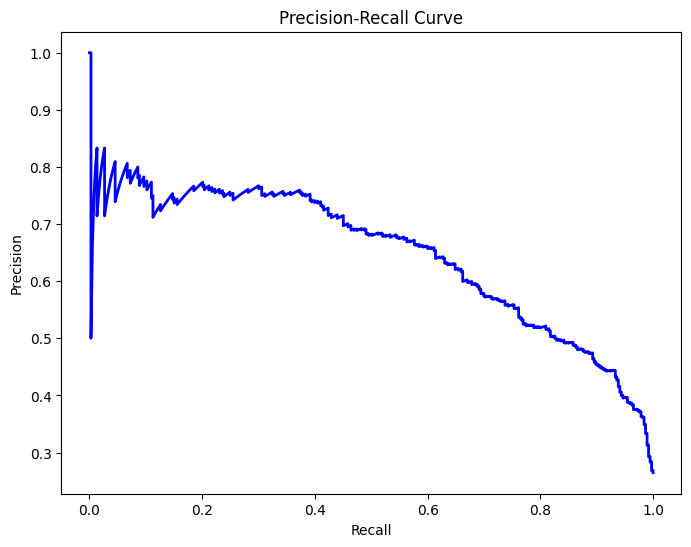

In [73]:
# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_tensor, y_test_pred[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

## 10. Save the Model

Finally, we save the trained model to a file so that it can be loaded and used later for inference or further training.

In [74]:
# Save the model
torch.save(model.state_dict(), "ann_customer_churn_model.pth")